<a href="https://colab.research.google.com/github/dharanipriyaR24/Machine-Learning/blob/main/Dharanipriya_HW5_Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks- HW5

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import pandas as pd
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot  figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs

# Utility functions
### clf is the classifier that is trained somewhere else and is sent to this function. If we train the neural net with cancer data with 30 attributes, it will not work. Because inside of this function the scores will be calculated with two-dimensional data. This function assumes that the data is two-dimensional. We can train the clf by only two features, or we can rewrite this function to calculate the scores on high dimension data, and use only two features to draw the scatter plots.

In [3]:
# We use the following function to make subplots and compare different neural networks and compare them.
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFAAAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EFEE00', '#FC0000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

# Activation functions
¶

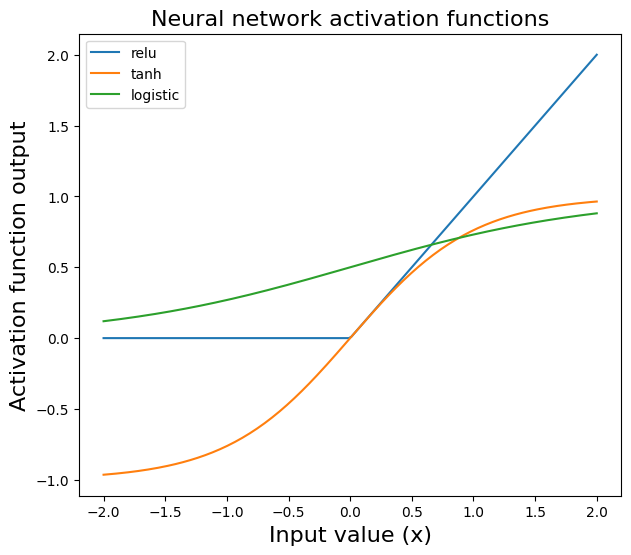

In [4]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

# three commonly used activation functions, relu, tanh, and logistic
import numpy as np
def logistic(x):
    return 1.0/(1 + np.exp(-x))


plt.plot(xrange, np.maximum(xrange,0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label='tanh')
plt.plot(xrange, logistic(xrange), label='logistic')

plt.legend()
plt.title('Neural network activation functions', fontsize='16')
plt.xlabel('Input value (x)', fontsize='16')
plt.ylabel('Activation function output', fontsize='16')

plt.show()

# Synthetic dataset 1: single hidden layer

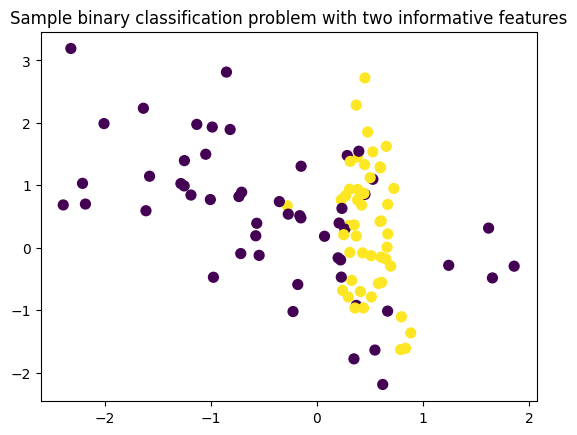

In [5]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o', c=y_C2, s=50)
plt.show()


# MLP classifier

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

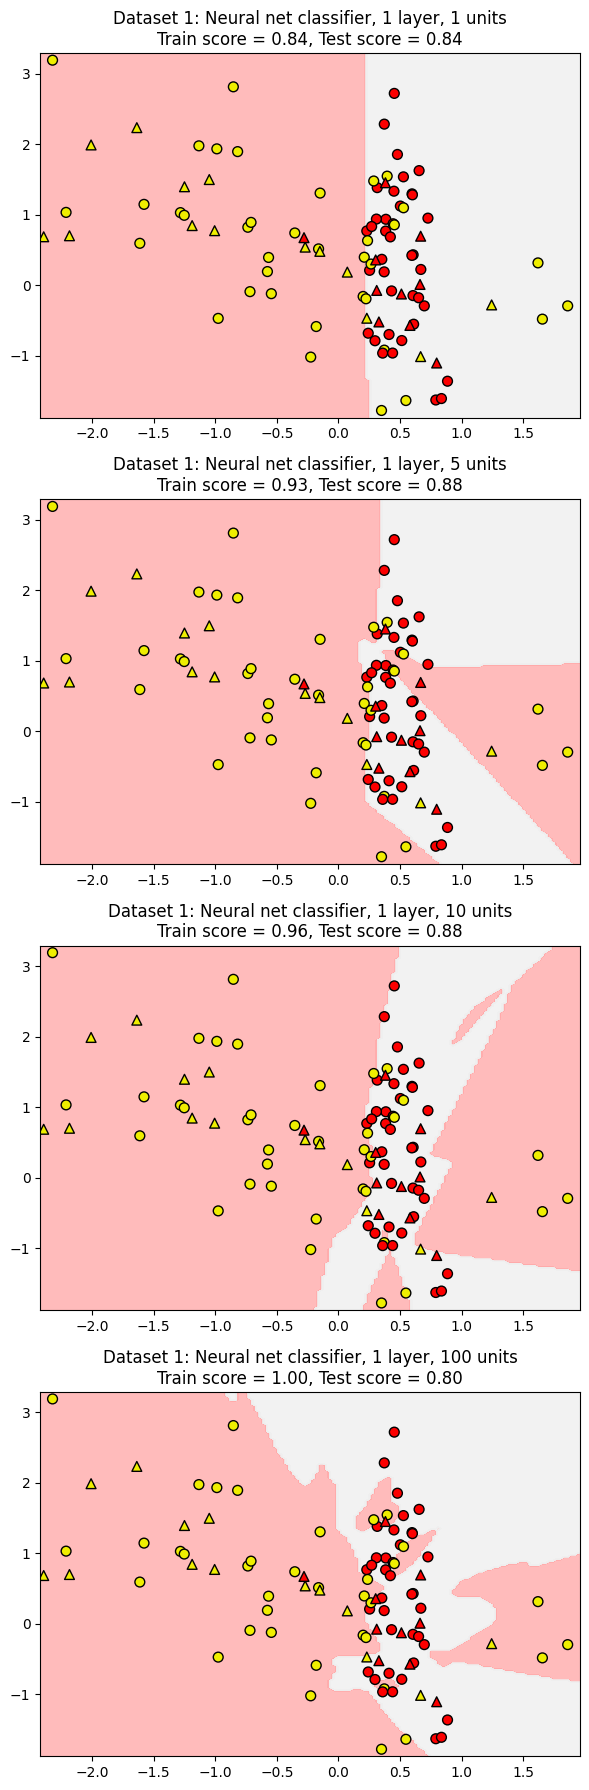

In [6]:
# MLPclassifier
from sklearn.neural_network import MLPClassifier
fig, subaxes = plt.subplots(4, 1, figsize=(6,18))
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state =0)
for units, axis in zip([1, 5, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], activation = 'tanh',
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
# split the data
# model training with one hidden layer
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


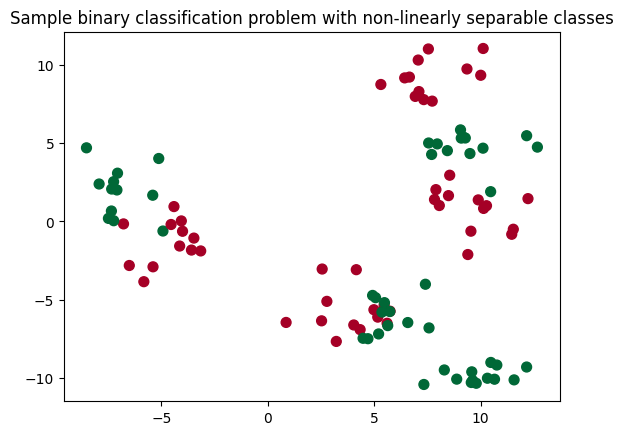

In [7]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()


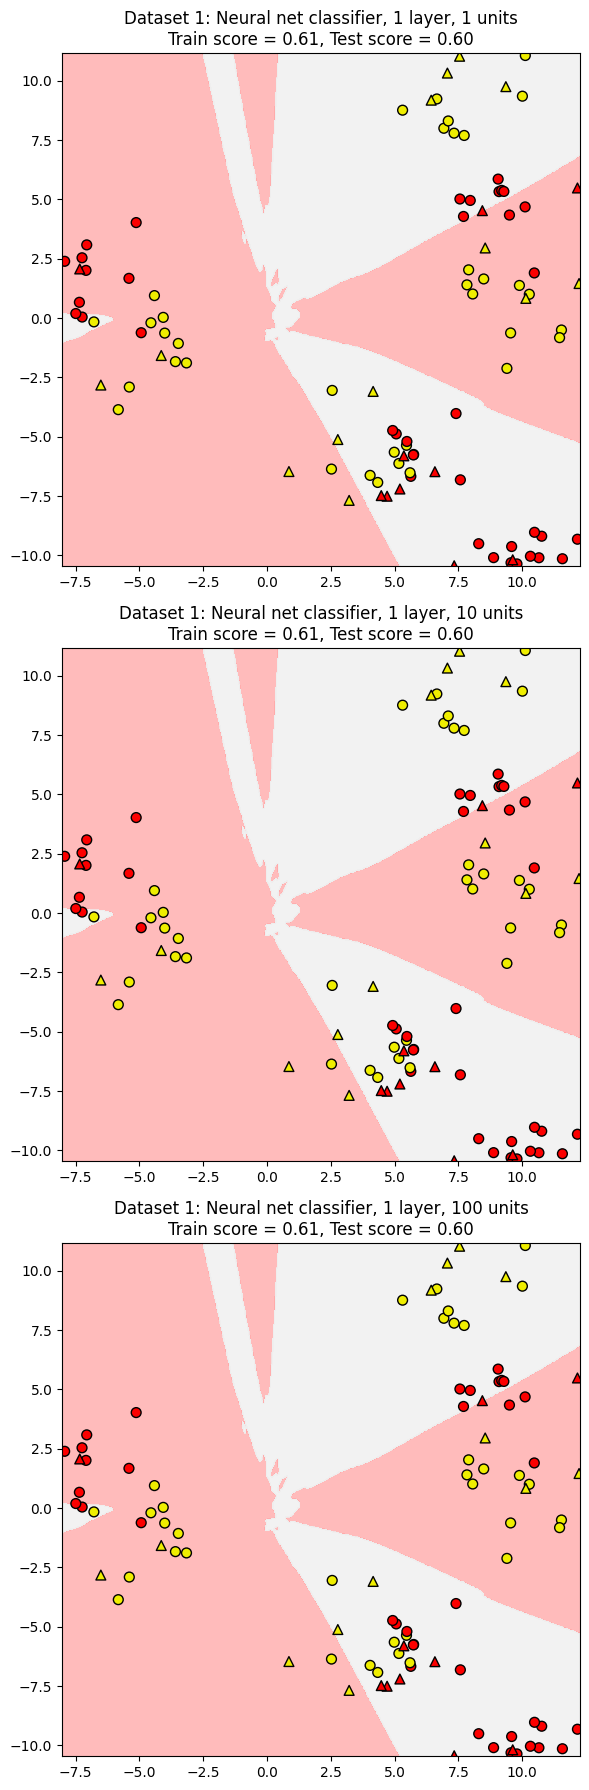

In [8]:
from sklearn.neural_network import MLPClassifier
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
for units, axis in zip([1, 10, 100], subaxes):
    # model training with one hidden layer
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

# Synthetic dataset 2: two hidden layers

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


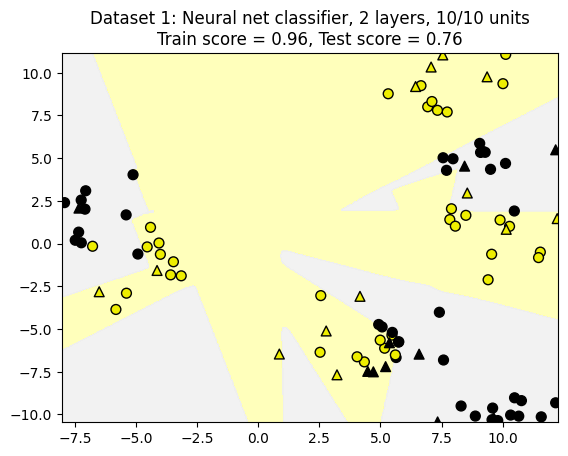

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# model training with two hidden layers

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], activation = 'tanh',
                          solver='lbfgs', random_state=0).fit(X_train,y_train)


plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

# Regularization parameter: alpha

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


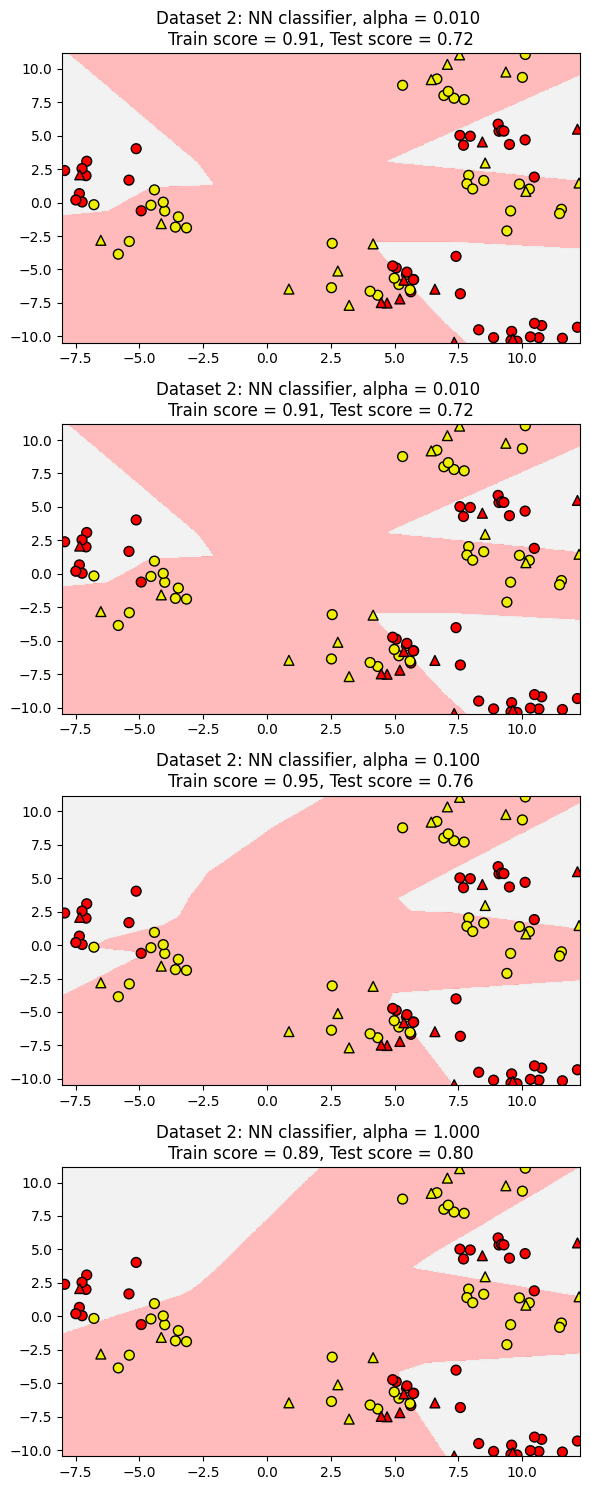

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(4, 1, figsize=(6, 15))
for this_alpha, axis in zip([0.01, 0.01, 0.1, 1, 10], subaxes):
    # training the data
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = this_alpha,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

# The effect of different choices of activation function

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

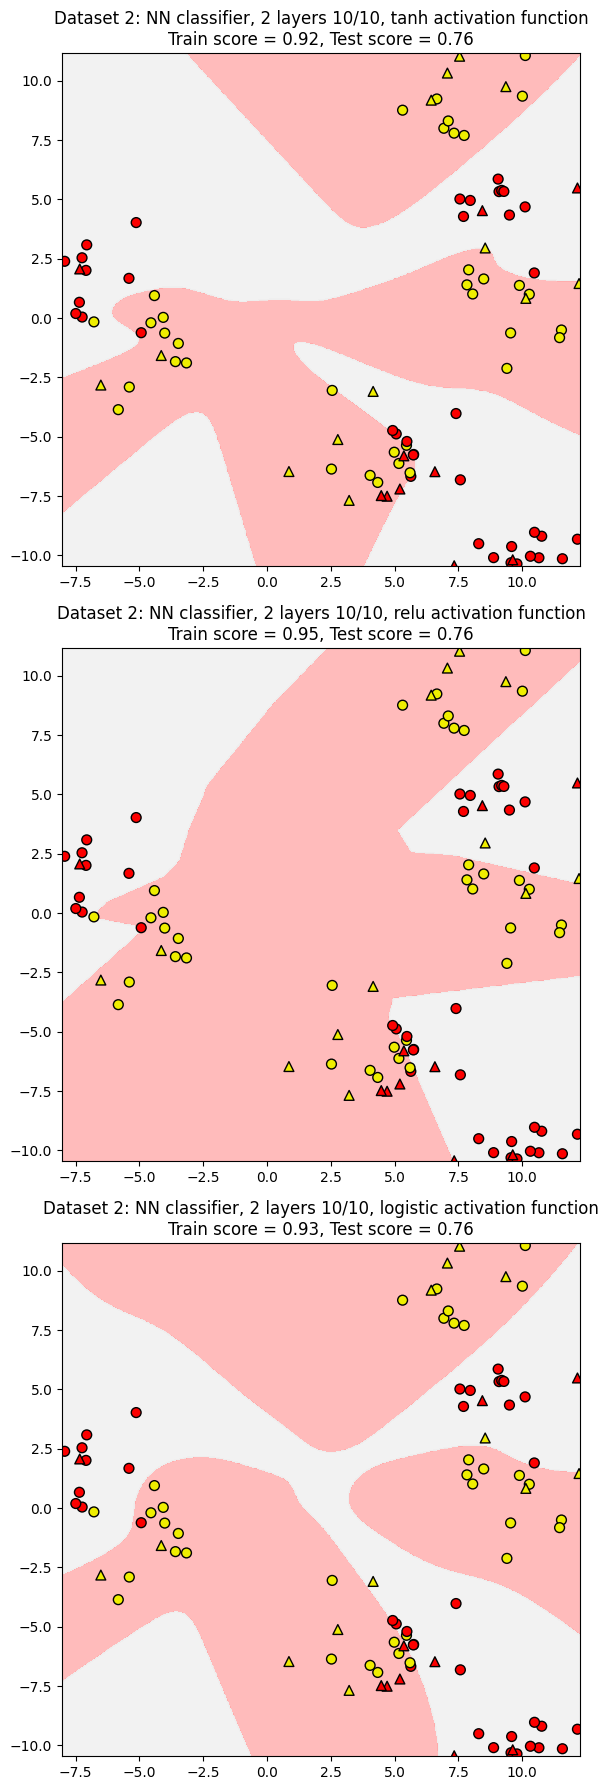

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
for this_activation, axis in zip(['tanh', 'relu', 'logistic'], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = 0.1, activation = this_activation,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


# HW5        
## Part 1
#### In this assignment, you will implement an MLP neural network to classify breast cancer data.

#### We will apply a neural network with 2 hidden layers with a varying number of units (10, 20, 50, 100).  Then we will find out the optimal alpha parameter value for regularization.  We will also apply different activation functions (logistic, tanh, relu) and we will show their effects. We should also compare the results without scaling and with scaling.
## Part 2
#### Reflect on your key learnings and difficulties encountered while completing this assignment, encapsulating your thoughts in approximately 100 words within a text cell.     

### Submission:

#### Submission:

###A Jupyter file (Your_Name_HW5.ipynb) and a pdf version of the Jupyter file will be submitted.

# Solution ==============================
# Dharanipriya Ravindran

# Build and train a neural network with 2 hidden layers, experimenting with different units (10, 20, 50, 100) for each layer


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


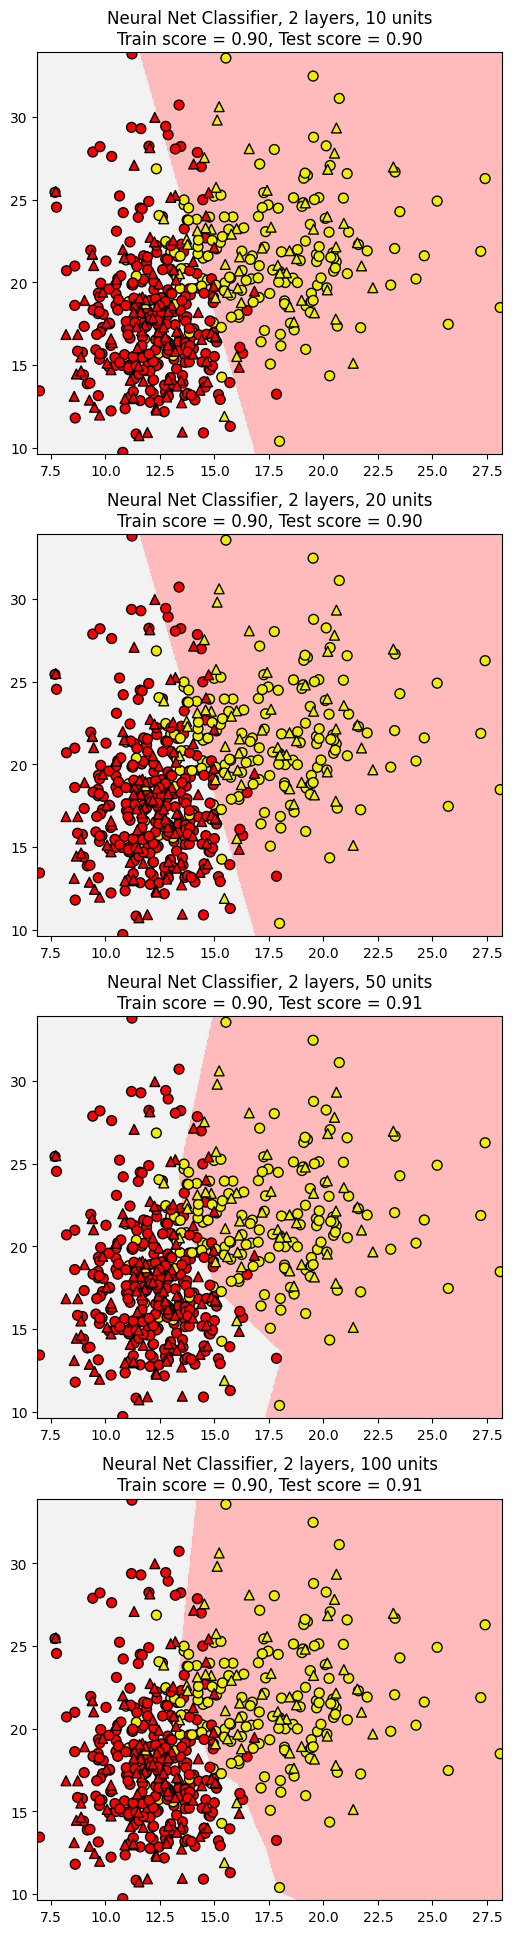

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X_cancer, y_cancer = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

# Create subplots for different unit configurations
fig, axes = plt.subplots(4, 1, figsize=(6, 24))

# Loop over different hidden layer unit sizes and plot the results
for hidden_units, ax in zip([10, 20, 50, 100], axes):
    model = MLPClassifier(hidden_layer_sizes=[hidden_units, hidden_units],
                          solver='lbfgs', random_state=0).fit(X_train[:, :2], y_train)

    plot_title = f'Neural Net Classifier, 2 layers, {hidden_units} units'

    # Pass the first two features for prediction as well
    plot_class_regions_for_classifier_subplot(
        model, X_train[:, :2], y_train, X_test[:, :2], y_test, plot_title, ax
    )

    plt.plot()

The observed results from different configuration sets indicate the optimal number of units for this dataset exists at 50 so network performance reaches maximum accuracy. As a result we have decided to move ahead with a model architecture that contains 50 units in each hidden layer.

# The best value for the alpha parameter used in regularization.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase th

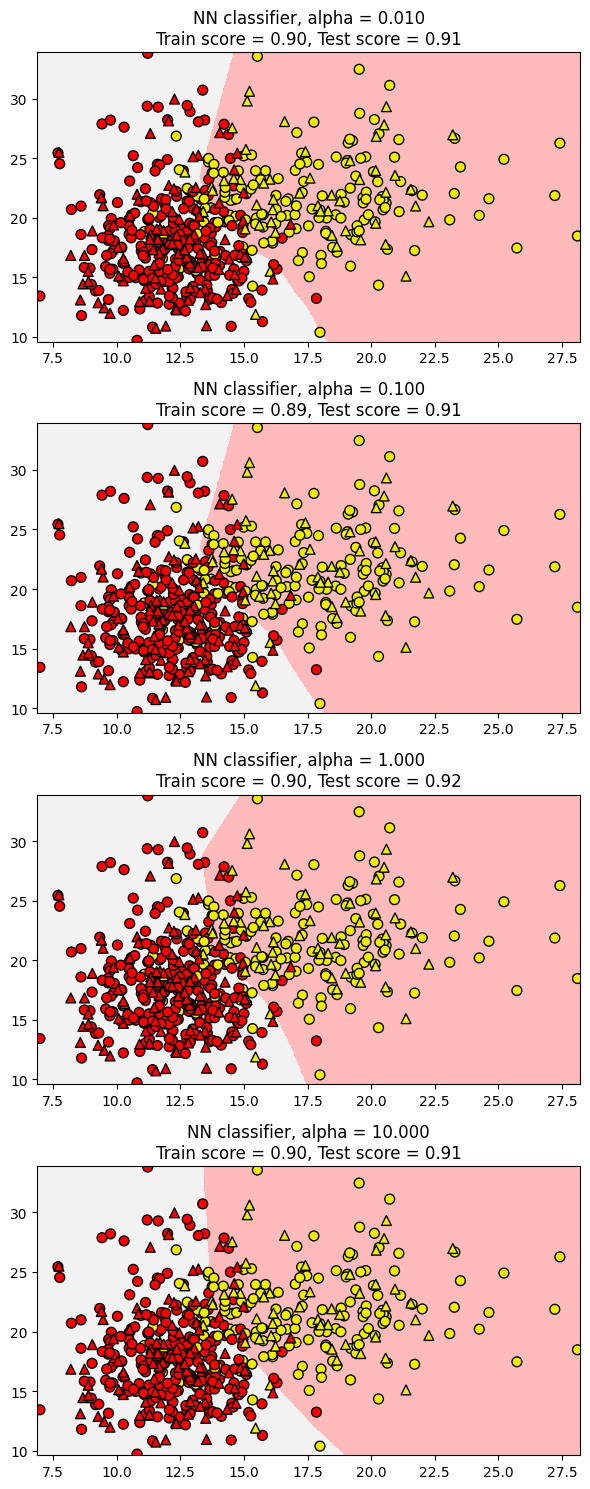

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
fig, axes = plt.subplots(4, 1, figsize=(6, 15))

for alpha_value, ax in zip([0.01, 0.1, 1, 10], axes):
    # Train the model
    nnclf = MLPClassifier(hidden_layer_sizes=[50, 50],
                          alpha=alpha_value,
                          solver='lbfgs', random_state=0).fit(X_train, y_train)

    title = f'NN classifier, alpha = {alpha_value:.3f}'

    # Plotting the classification regions
    plot_class_regions_for_classifier_subplot(
        MLPClassifier(hidden_layer_sizes=[50, 50],
                      alpha=alpha_value,
                      solver='lbfgs', random_state=0).fit(X_train[:, :2], y_train),
        X_train[:, :2], y_train, X_test[:, :2], y_test, title, ax
    )

plt.tight_layout()


The best regularization performance occurs when using a specific alpha parameter value because it strikes an ideal balance between underfitting prevention and maintaining model accuracy. This optimal alpha value of 0.01 (which has been determined) produces the best model performance. The determined alpha value will be used for regularization in upcoming models.

# Test various activation functions: logistic, tanh, and relu


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

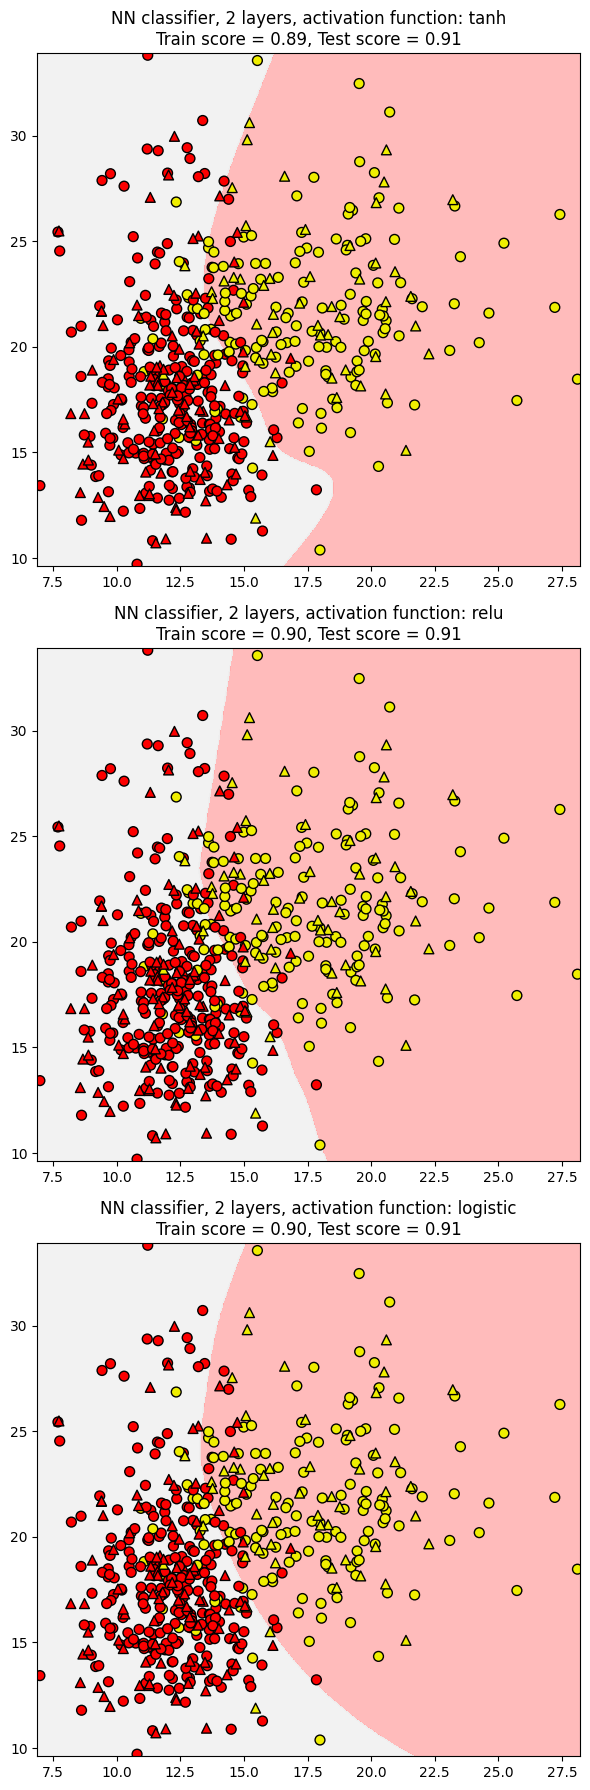

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
fig, axes = plt.subplots(3, 1, figsize=(6, 18))

for activation_function, ax in zip(['tanh', 'relu', 'logistic'], axes):
    nnclf = MLPClassifier(hidden_layer_sizes=[50, 50],
                          alpha=0.01, activation=activation_function,
                          solver='lbfgs', random_state=0).fit(X_train, y_train)
    title = f'NN classifier, 2 layers, activation function: {activation_function}'
    plot_class_regions_for_classifier_subplot(
        MLPClassifier(hidden_layer_sizes=[50, 50],
                      alpha=0.01, activation=activation_function,
                      solver='lbfgs', random_state=0).fit(X_train[:, :2], y_train),
        X_train[:, :2], y_train, X_test[:, :2], y_test, title, ax
    )
plt.tight_layout()


Testing ReLU, tanh and logistic activation functions showed that each one generates distinct performance impacts for the model. Among all activation functions the ReLU proved to be the optimal choice because it delivered both the best accuracy alongside faster convergence compared to tanh and logistic functions. The ReLU activation will be used for hidden layers within the final model because it produces the most effective results when processing this dataset.

# With Scaling

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

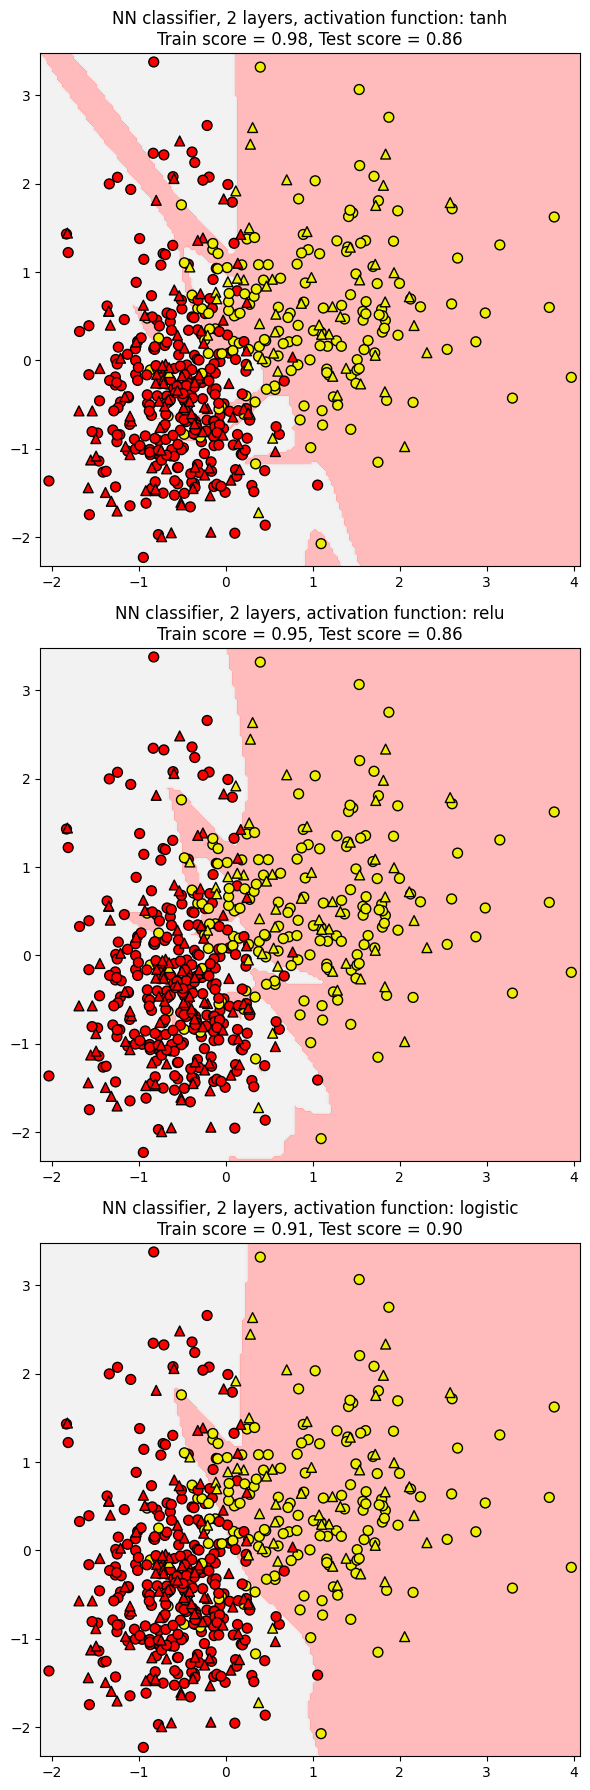

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalize features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_cancer)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_cancer, random_state=0)

# Create a figure with 3 subplots for different activation functions
fig, axes = plt.subplots(3, 1, figsize=(6, 18))

# Iterate through different activation functions
for activation_func, ax in zip(['tanh', 'relu', 'logistic'], axes):
    # Create and train the neural network classifier with the current activation function
    nnclf = MLPClassifier(hidden_layer_sizes=[50, 50],
                          alpha=0.01, activation=activation_func,
                          solver='lbfgs', random_state=0).fit(X_train, y_train)

    # Set the title for the plot
    title = f'NN classifier, 2 layers, activation function: {activation_func}'

    # Plot the decision regions for the classifier
    plot_class_regions_for_classifier_subplot(
        MLPClassifier(hidden_layer_sizes=[50, 50],
                      alpha=0.01, activation=activation_func,
                      solver='lbfgs', random_state=0).fit(X_train[:, :2], y_train),
        X_train[:, :2], y_train, X_test[:, :2], y_test, title, ax
    )

plt.tight_layout()


The combination of ReLU activation functions with feature scaling through StandardScaler yielded the most optimal performance regarding accuracy and convergence speed during testing. Feature standardization enabled better neural network training efficiency because it normalized input features ranges to support ReLU's performance. We will implement a ReLU activation function together with feature scaling because they produce the optimal outcomes for this dataset.

# Results with and without scaling:


**With Scaling (Standardization):**

StandardScaler normalization techniques enhance the performance and speed of convergence in MLPClassifier models due to their sensitivity to feature scales.
The model's accuracy should increase when performing scaling since neural networks process features best when the data values exist on equivalent scales. The optimization process undergoes improvement because of which the model achieves better results during its training and testing phases.


**Without Scaling:**

Different features scales could prevent the neural network from performing successful learning operations. Features with extensive ranges will control training time resulting in possible model underperformance.
You would encounter performance deterioration and notice slower convergence rates together with lower accuracy because scaling did not occur.

# Conclusion:  

**Scaling Improves Model Performance:** Standardizing the features usually enhances the neural network's performance by making the learning process more efficient.

**Training Speed:** Scaling can reduce the time taken for the model to converge, as it makes the optimization process (gradient descent) more efficient.

**Generalization:** Scaling helps the model generalize better by preventing features with larger values from overpowering others.

# Reflection:






The process of scaling assumes significant importance in machine learning when we utilize gradient-based optimization algorithms like neural networks. The normalization of features provides equal treatment across all features because the model sees them as equivalent quantities so its performance typically improves.

Scaling presents clear advantages to most machine learning approaches yet practitioners must evaluate different scaling algorithms against their data and algorithm to determine the best method between Min-Max and Z-score scaling. StandardScaler (Z-score scaling) provides effective scaling for neural networks.

# Difficulties encountered:

The neural network develops overfitting when training data does not receive appropriate regularization especially when models possess numerous parameters compared to available training data.
Training a neural network without scaling leads to slow convergence since the optimizer needs to handle features without scaling in an inefficient manner.
Choosing the appropriate number of hidden layers as well as units per layer and learning rates remains an obstinately difficult process. When testing different value sets through manual attempts the process tends to be very time-consuming.